In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\joao.a.silveira\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\joao.a.silveira\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\joao.a.silveira\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\joao.a.silveira\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Importacíon de los ficheros y cargaments en DFs

In [3]:
df_od2014 = pd.read_csv("OD_2014.csv")
df_od2015 = pd.read_csv("OD_2015.csv")
df_od2016 = pd.read_csv("OD_2016.csv")
df_od2017 = pd.read_csv("OD_2017.csv")

C:\Users\joao.a.silveira\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_station2014 = pd.read_csv("Stations_2014.csv")
df_station2015 = pd.read_csv("Stations_2015.csv")
df_station2016 = pd.read_csv("Stations_2016.csv")
df_station2017 = pd.read_csv("Stations_2017.csv")

In [5]:
df_od2014.columns

Index(['Unnamed: 0', 'start_date', 'start_station_code', 'end_date',
       'end_station_code', 'duration_sec', 'is_member'],
      dtype='object')

In [6]:
cols = ['start_date', 'start_station_code', 'end_date',
       'end_station_code', 'duration_sec', 'is_member']

In [7]:
df_od2014 = df_od2014[cols]
df_od2015 = df_od2015[cols]
df_od2016 = df_od2016[cols]
df_od2017 = df_od2017[cols]

# Feature engineering
En esta seccíon fueran creadas y transformadas algunas features para poder hacer calculos y contestar as questiones pedidas como:
- Passar la informacion en el csv de las estaciones para lo df que contiene la restante informacion para trabajar en solo uno DF
- Cálculo de la duracíon en minutos
- Cálculo de la distancia y velocidad media por viaje
- Agregamiento de todos los años en solo un DF para hacer comparaciones

In [8]:
df_od2014["duration_min"] = df_od2014["duration_sec"] / 60
df_od2015["duration_min"] = df_od2015["duration_sec"] / 60
df_od2016["duration_min"] = df_od2016["duration_sec"] / 60
df_od2017["duration_min"] = df_od2017["duration_sec"] / 60
df_od2014.duration_min = df_od2014.duration_min.astype(int)
df_od2015.duration_min = df_od2015.duration_min.astype(int)
df_od2016.duration_min = df_od2016.duration_min.astype(int)
df_od2017.duration_min = df_od2017.duration_min.astype(int)

In [9]:
df_od2014['start_date'] = pd.to_datetime(df_od2014['start_date']);
df_od2015['start_date'] = pd.to_datetime(df_od2015['start_date']);
df_od2016['start_date'] = pd.to_datetime(df_od2016['start_date']);
df_od2017['start_date'] = pd.to_datetime(df_od2017['start_date']);
df_od2014['end_date'] = pd.to_datetime(df_od2014['end_date']);
df_od2015['end_date'] = pd.to_datetime(df_od2015['end_date']);
df_od2016['end_date'] = pd.to_datetime(df_od2016['end_date']);
df_od2017['end_date'] = pd.to_datetime(df_od2017['end_date']);

In [10]:
df_od2014 = pd.merge(left=df_od2014, right=df_station2014[["code","name","latitude","longitude"]], left_on='start_station_code', right_on='code')
df_od2014 = df_od2014.rename(columns = {'name': 'start_station_name',
                                        'latitude': 'start_station_latitude',
                                        'longitude': 'start_station_longitude'}, inplace = False)
df_od2014 = df_od2014.drop(columns = ['code'])
df_od2015 = pd.merge(left=df_od2015, right=df_station2014[["code","name","latitude","longitude"]], left_on='start_station_code', right_on='code')
df_od2015 = df_od2015.rename(columns = {'name': 'start_station_name',
                                       'latitude': 'start_station_latitude',
                                       'longitude': 'start_station_longitude'}, inplace = False)
df_od2015 = df_od2015.drop(columns = ['code'])
df_od2016 = pd.merge(left=df_od2016, right=df_station2014[["code","name","latitude","longitude"]], left_on='start_station_code', right_on='code')
df_od2016 = df_od2016.rename(columns = {'name': 'start_station_name',
                                        'latitude': 'start_station_latitude',
                                        'longitude': 'start_station_longitude'}, inplace = False)
df_od2016 = df_od2016.drop(columns = ['code'])
df_od2017 = pd.merge(left=df_od2017, right=df_station2014[["code","name","latitude","longitude"]], left_on='start_station_code', right_on='code')
df_od2017 = df_od2017.rename(columns = {'name': 'start_station_name',
                                        'latitude': 'start_station_latitude',
                                        'longitude': 'start_station_longitude'}, inplace = False)
df_od2017 = df_od2017.drop(columns = ['code'])

In [11]:
df_od2014 = pd.merge(left=df_od2014, right=df_station2014[["code","name","latitude","longitude"]], left_on='end_station_code', right_on='code')
df_od2014 = df_od2014.rename(columns = {'name': 'end_station_name',
                                        'latitude': 'end_station_latitude',
                                        'longitude': 'end_station_longitude'}, inplace = False)
df_od2014 = df_od2014.drop(columns = ['code'])
df_od2015 = pd.merge(left=df_od2015, right=df_station2014[["code","name","latitude","longitude"]], left_on='end_station_code', right_on='code')
df_od2015 = df_od2015.rename(columns = {'name': 'end_station_name',
                                        'latitude': 'end_station_latitude',
                                        'longitude': 'end_station_longitude'}, inplace = False)
df_od2015 = df_od2015.drop(columns = ['code'])
df_od2016 = pd.merge(left=df_od2016, right=df_station2014[["code","name","latitude","longitude"]], left_on='end_station_code', right_on='code')
df_od2016 = df_od2016.rename(columns = {'name': 'end_station_name',
                                        'latitude': 'end_station_latitude',
                                        'longitude': 'end_station_longitude'}, inplace = False)
df_od2016 = df_od2016.drop(columns = ['code'])
df_od2017 = pd.merge(left=df_od2017, right=df_station2014[["code","name","latitude","longitude"]], left_on='end_station_code', right_on='code')
df_od2017 = df_od2017.rename(columns = {'name': 'end_station_name',
                                        'latitude': 'end_station_latitude',
                                        'longitude': 'end_station_longitude'}, inplace = False)
df_od2017 = df_od2017.drop(columns = ['code'])

In [12]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [13]:
# Calcular distancia para calcular velocidade media

distances_km = []

for row in df_od2014.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.start_station_latitude, row.start_station_longitude, row.end_station_latitude, row.end_station_longitude)
   )

df_od2014['Distance'] = distances_km

distances_km = []

for row in df_od2015.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.start_station_latitude, row.start_station_longitude, row.end_station_latitude, row.end_station_longitude)
   )

df_od2015['Distance'] = distances_km

distances_km = []

for row in df_od2016.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.start_station_latitude, row.start_station_longitude, row.end_station_latitude, row.end_station_longitude)
   )

df_od2016['Distance'] = distances_km

distances_km = []

for row in df_od2017.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.start_station_latitude, row.start_station_longitude, row.end_station_latitude, row.end_station_longitude)
   )

df_od2017['Distance'] = distances_km

In [14]:
df_od2014['Velocity'] = ((df_od2014['Distance'] * 1000) / df_od2014['duration_sec']) * 3.6
df_od2015['Velocity'] = ((df_od2015['Distance'] * 1000) / df_od2015['duration_sec']) * 3.6
df_od2016['Velocity'] = ((df_od2016['Distance'] * 1000) / df_od2016['duration_sec']) * 3.6
df_od2017['Velocity'] = ((df_od2017['Distance'] * 1000) / df_od2017['duration_sec']) * 3.6

In [15]:
df_od = pd.concat([df_od2014, df_od2015, df_od2016, df_od2017], ignore_index=True)

In [16]:
df_od.to_csv("OD_ALL.csv")

# Análise de los datos 

### Histograma de tiempos de viaje para un año dado (2014)

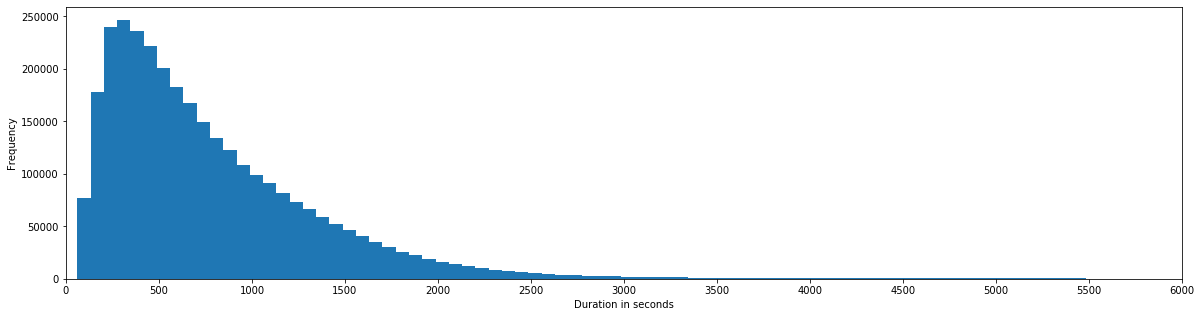

In [17]:
plt.figure(figsize=(20,5));
plt.xlim([0, 6000])
values = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
plt.xticks(values)
df_od2014['duration_sec'].plot.hist(bins=100);
plt.xlabel('Duration in seconds');

Text(0.5, 0, 'Duration in minutes')

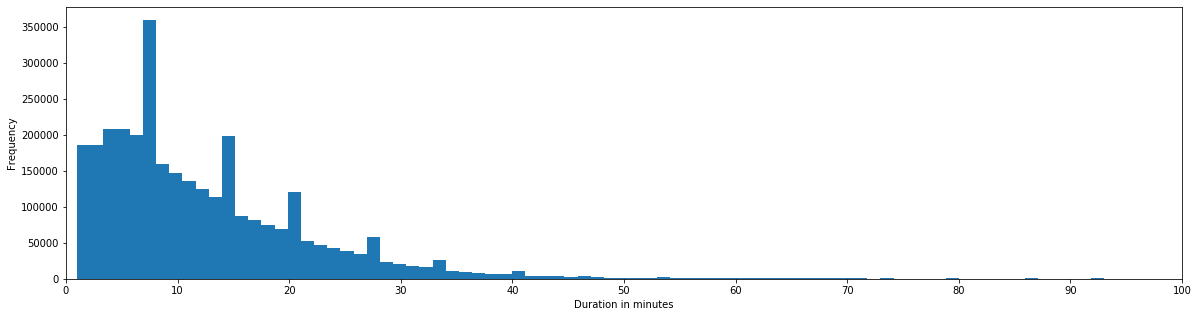

In [18]:
plt.figure(figsize=(20,5));
plt.xlim([0, 100])
values = [0,10,20,30,40,50,60,70,80,90,100]
plt.xticks(values)
df_od2014['duration_min'].plot.hist(bins = 100);
plt.xlabel('Duration in minutes')

## Listado del Top 10 de estaciones más utilizadas para un año dado (2014)


### Estaciones de salida

In [19]:
df_od2014_start_station = df_od2014.groupby('start_station_name').count()
df_od2014_start_station = df_od2014_start_station[['start_date']]
df_od2014_start_station = df_od2014_start_station.rename(columns = {'start_date': 'count'}, inplace = False)

In [20]:
df_od2014_top10_start_station = df_od2014_start_station.nlargest(10, 'count')
df_od2014_top10_start_station

count
start_station_name                                   
Métro Mont-Royal (Rivard / du Mont-Royal)       45600
de Maisonneuve / de Bleury                      33241
de Maisonneuve / Stanley                        32055
Square St-Louis                                 28224
Mackay /de Maisonneuve (Sud)                    27072
du Mont-Royal / Clark                           24448
Métro St-Laurent (de Maisonneuve / St-Laurent)  24274
St-Dominique / Rachel                           22578
St-André / Laurier                              22279
Marquette / du Mont-Royal                       21799

Text(0.5, 0, 'count')

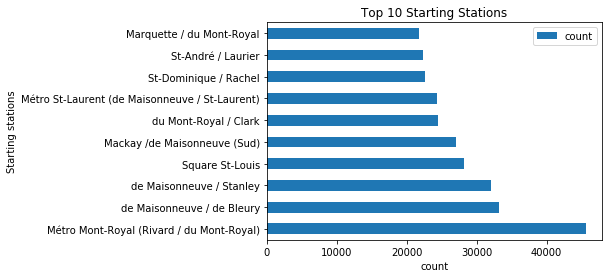

In [21]:
df_od2014_top10_start_station.plot(kind = 'barh',title = "Top 10 Starting Stations")
plt.title("Top 10 Starting Stations")
plt.ylabel("Starting stations")
plt.xlabel("count")

### Estaciones de llegada

In [22]:
df_od2014_end_station = df_od2014.groupby('end_station_name').count()
df_od2014_end_station = df_od2014_end_station[['start_date']]
df_od2014_end_station = df_od2014_end_station.rename(columns = {'start_date': 'count'}, inplace = False)

In [23]:
df_od2014_top10_end_station = df_od2014_end_station.nlargest(10, 'count')
df_od2014_top10_end_station

count
end_station_name                                     
Métro Mont-Royal (Rivard / du Mont-Royal)       43765
de Maisonneuve / de Bleury                      39310
de Maisonneuve / Stanley                        34819
Métro St-Laurent (de Maisonneuve / St-Laurent)  34664
Berri / de Maisonneuve                          31664
St-Urbain / René-Lévesque                       27886
Mackay /de Maisonneuve (Sud)                    26837
Square Victoria                                 24032
Métro Place-d'Armes (Viger / St-Urbain)         23123
Ste-Catherine / St-Hubert                       21978

Text(0.5, 0, 'count')

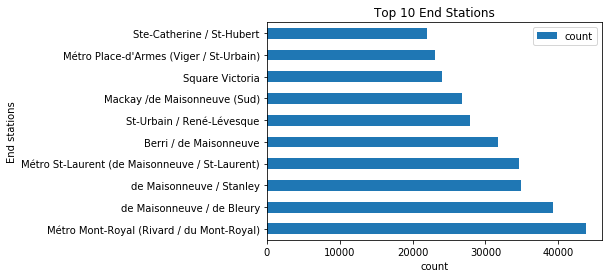

In [24]:
df_od2014_top10_end_station.plot(kind = 'barh',title = "Top 10 End Stations")
plt.title("Top 10 End Stations")
plt.ylabel("End stations")
plt.xlabel("count")

### En general

In [25]:
df_od2014_start_station = df_od2014_start_station.rename(columns = {'count': 'start_station_count'}, inplace = False)
df_od2014_end_station = df_od2014_end_station.rename(columns = {'count': 'end_station_count'}, inplace = False)

In [26]:
df_od2014_general_count =  df_od2014_start_station.merge(df_od2014_end_station, left_index=True, right_index=True)
df_od2014_general_count["station_count"] = df_od2014_general_count["start_station_count"] + df_od2014_general_count["end_station_count"]
df_od2014_top10_station = df_od2014_general_count.nlargest(10, 'station_count').drop(columns = ['start_station_count','end_station_count'])
df_od2014_top10_station.nlargest(10, 'station_count')

station_count
start_station_name                                           
Métro Mont-Royal (Rivard / du Mont-Royal)               89365
de Maisonneuve / de Bleury                              72551
de Maisonneuve / Stanley                                66874
Métro St-Laurent (de Maisonneuve / St-Laurent)          58938
Mackay /de Maisonneuve (Sud)                            53909
Berri / de Maisonneuve                                  49417
Square St-Louis                                         47838
St-Urbain / René-Lévesque                               46876
du Mont-Royal / Clark                                   45408
Roy / St-Laurent                                        43330

Text(0.5, 0, 'count')

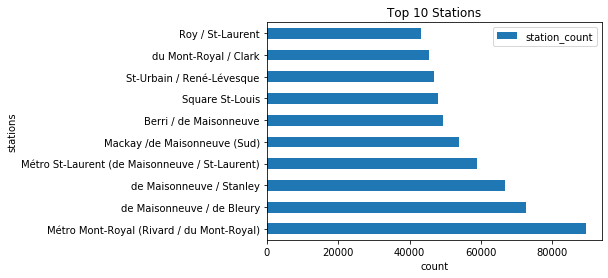

In [27]:
df_od2014_top10_station.plot(kind = 'barh',title = "Top 10 Stations")
plt.title("Top 10 Stations")
plt.ylabel("stations")
plt.xlabel("count")

### Listado del Top 10 de viajes más comunes para un año dado. Donde un viaje se define por su estación de salida y de llegada

In [28]:
df_od2014_aux = df_od2014
df_od2014_aux['trip'] = df_od2014_aux['start_station_name'] + ' to ' + df_od2014_aux['end_station_name']
df_od2014_trips = df_od2014_aux.groupby('trip').count()
df_od2014_trips = df_od2014_trips[['start_date']]
df_od2014_trips = df_od2014_trips.rename(columns = {'start_date': 'trips count'}, inplace = False)
df_od2014_top10_trips = df_od2014_trips.nlargest(10, 'trips count')
df_od2014_trips.nlargest(10, 'trips count')

trips count
trip                                                           
Métro Jean-Drapeau to Métro Jean-Drapeau                   2853
de la Commune / Place Jacques-Cartier to de la ...         1809
Garnier / du Mont-Royal to Métro Mont-Royal (Ri...         1670
Marquette / du Mont-Royal to Métro Mont-Royal (...         1660
de Maisonneuve / Stanley to Mackay /de Maisonne...         1629
Métro Pie-IX (Pierre-de-Coubertin / Pie-IX) to ...         1617
Métro Mont-Royal (Rivard / du Mont-Royal) to Ga...         1546
Métro Mont-Royal (Rivard / du Mont-Royal) to Ma...         1493
de Maisonneuve / Stanley to Tupper / Atwater               1413
Mackay /de Maisonneuve (Sud) to de Maisonneuve ...         1393

Text(0.5, 0, 'count')

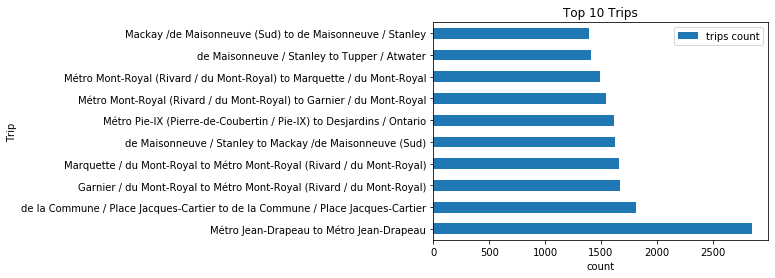

In [29]:
df_od2014_top10_trips.plot(kind = 'barh')
plt.title("Top 10 Trips")
plt.ylabel("Trip")
plt.xlabel("count")

## Analise de las viajes por hora del dia, independientemente del dia

Text(0.5, 0, 'Hour')

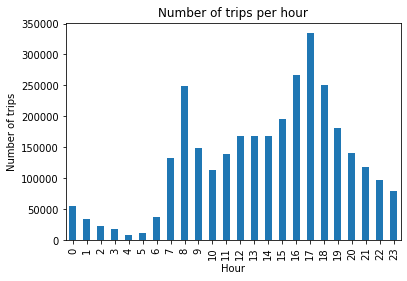

In [30]:
df_od2014_aux = df_od2014
df_od2014_aux['hour'] = df_od2014_aux.start_date.dt.hour
df_od2014_aux.groupby('hour').count()['duration_sec'].plot(kind='bar')
plt.title("Number of trips per hour")
plt.ylabel("Number of trips")
plt.xlabel("Hour")

## Comparación de entre los años de las principales metricas


### Cantidad de viajes totales

Text(0.5, 0, 'Year')

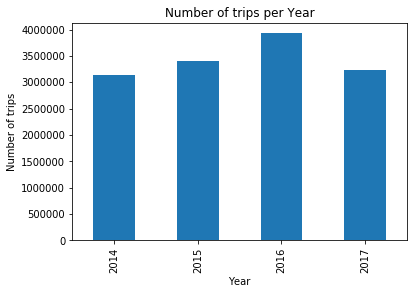

In [31]:
df_od_aux = df_od
df_od_aux['Year'] = df_od_aux.start_date.dt.year
df_od_aux.groupby('Year').count()['duration_sec'].plot(kind='bar')
plt.title("Number of trips per Year")
plt.ylabel("Number of trips")
plt.xlabel("Year")

### Tiempo de viaje medio por año

Text(0.5, 0, 'Year')

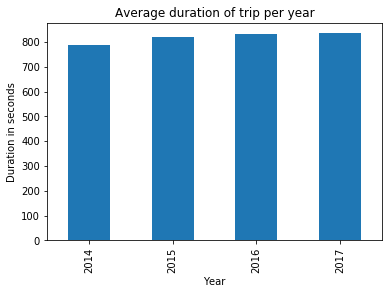

In [32]:
df_od_aux = df_od
df_od_aux['Year'] = df_od_aux.start_date.dt.year
df_od_aux.groupby('Year').mean()['duration_sec'].plot(kind='bar')
plt.title("Average duration of trip per year")
plt.ylabel("Duration in seconds")
plt.xlabel("Year")

In [33]:
df_od_aux['duration_sec'].mean()

819.6831459068333

### Número de estaciones por año

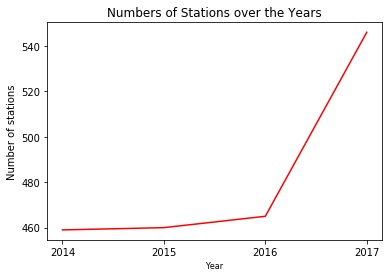

In [34]:
Station_number = [len(df_station2014), len(df_station2015), len(df_station2016), len(df_station2017)]
labels = ['2014','2015','2016','2017']
x = range(4)
plt.plot(Station_number, color = 'r', label = 'Station number')
plt.title('Numbers of Stations over the Years')
plt.xticks(x, labels)
plt.ylabel('Number of stations')
plt.xlabel('Year', fontsize=8)
plt.show()

### Velocidad media de las viajes por año

In [35]:
mean_velocity2014 = df_od2014['Velocity'].mean()
mean_velocity2015 = df_od2015['Velocity'].mean()
mean_velocity2016 = df_od2016['Velocity'].mean()
mean_velocity2017 = df_od2017['Velocity'].mean()

In [36]:
print("""The average velocity per year is the following:
    - 2014: """ , mean_velocity2014 , """ km/h 
    - 2015: """ , mean_velocity2015 , """ km/h 
    - 2016: """ , mean_velocity2016 , """ km/h 
    - 2017: """ , mean_velocity2017 , """ km/h """)

The average velocity per year is the following:
    - 2014:  9.973380194661162  km/h 
    - 2015:  9.389188602640466  km/h 
    - 2016:  9.106064577311365  km/h 
    - 2017:  9.026972615632733  km/h 


## Mapa de utilizacion de las estaciones

In [37]:
BBox = (df_station2014.longitude.min(), df_station2014.longitude.max(),      
        df_station2014.latitude.min(), df_station2014.latitude.max())

In [38]:
BBox

(-73.67063373327254, -73.49506705999373, 45.43443353453235, 45.58077)

In [39]:
img = plt.imread('Montreal.png')

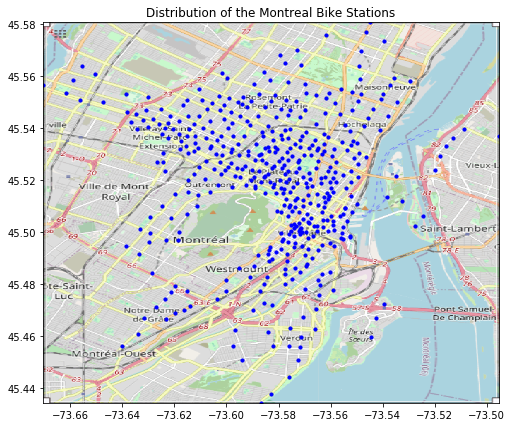

In [40]:
fig, ax = plt.subplots(figsize = (14,7))
ax.scatter(df_station2014.longitude, df_station2014.latitude, zorder=1, alpha= 1, c='b', s=10)
ax.set_title('Distribution of the Montreal Bike Stations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(img, zorder = 0, extent = BBox, aspect= 'equal')